In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")


# Project Overview

For our project, we wanted to focus on which neighborhood is the best place to live. As college students at Pitt, many of us choose to move closer to campus. Whether a student is from the area or overseas, students may have questions about the surrounding area and how nice it would be to live there. I know I do.

This brings us to the dataset that I am measuring: The Median Age of Death. I chose this data set because I want to live a long, happy life. Therefore, the neighborhood with the highest median age at death would be considered the best neighborhood for this dataset.



In [4]:
deaths = pd.read_csv("deaths.tsv", sep="\t")
deaths = deaths.dropna()
deaths = deaths.drop(deaths.index[0])

In [5]:
med_deaths = deaths.groupby("NEIGHBORHOOD").sum()['TOTAL MD AGE AT DEATH']
med_deaths = med_deaths.sort_values(ascending = False)
med_deaths.sort_values(ascending = False)

NEIGHBORHOOD
SQUIRREL HILL SOUTH    85.9
NORTH OAKLAND          85.6
POINT BREEZE           85.1
SQUIRREL HILL NORTH    85.0
SWISSHELM PARK         83.1
                       ... 
MANCHESTER             67.4
ALLENTOWN              66.5
EAST ALLEGHENY         66.2
ARLINGTON HEIGHTS      63.7
FAIRYWOOD              53.3
Name: TOTAL MD AGE AT DEATH, Length: 68, dtype: float64

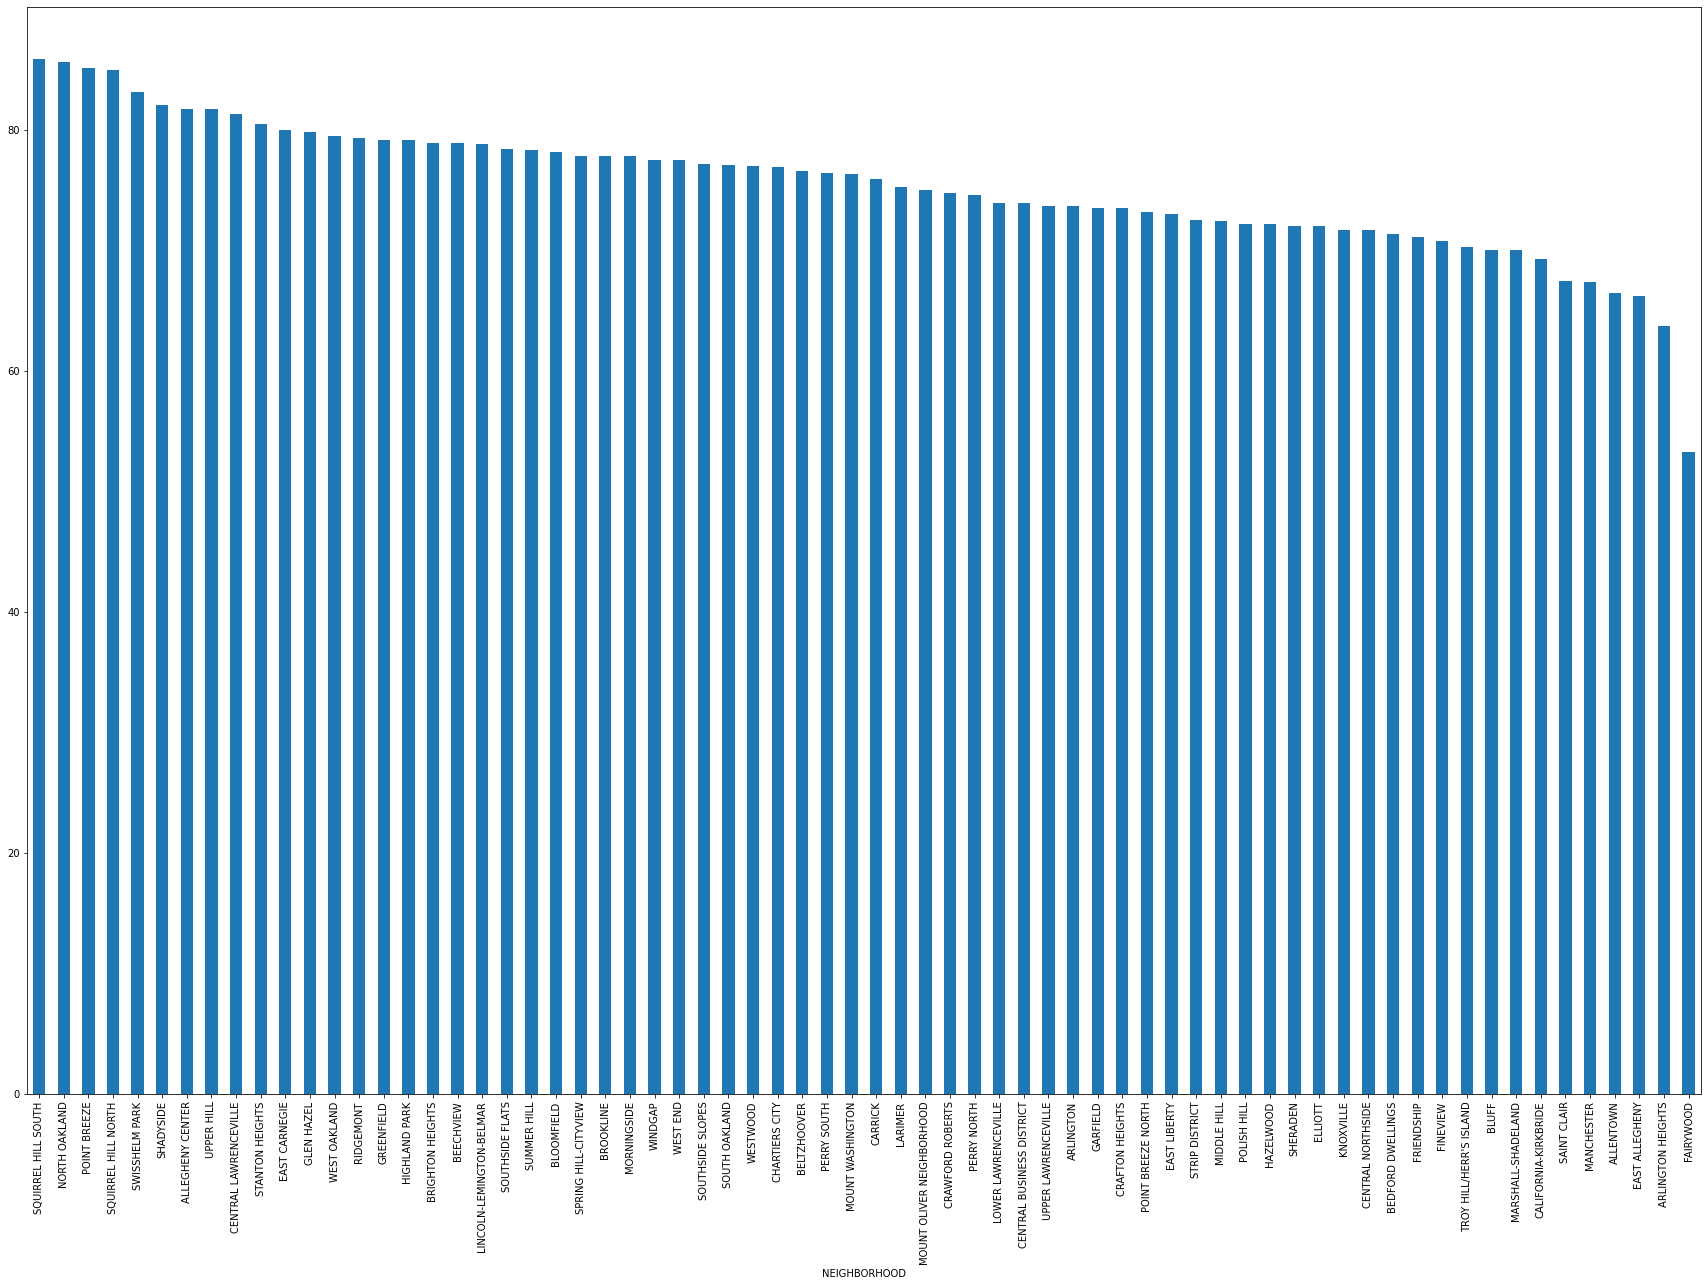

In [6]:
med_deaths.plot(kind='bar', x='NEIGHBORHOOD', y='TOTAL MD AGE AT DEATH', figsize=(30,20))


# Preliminary Analysis

In [7]:
#Creates a Column for Merging on the Neighborhoods dataset
neighborhoods.insert(0,'Median Death',deaths["TOTAL MD AGE AT DEATH"].fillna(0).astype('int64',errors='ignore'))

#Creates a Column for Merging on the Median Deaths dataset
deaths.insert(0,"Median Death",(deaths['TOTAL MD AGE AT DEATH']))

death_map = neighborhoods.merge(deaths, how='left', on = 'Median Death')


In [9]:
death_map[['hood','Median Death', 'geometry']].head(40)


,hood,Median Death,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,67.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,77.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,NaN,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,63.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,72.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Summer Hill,72.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."


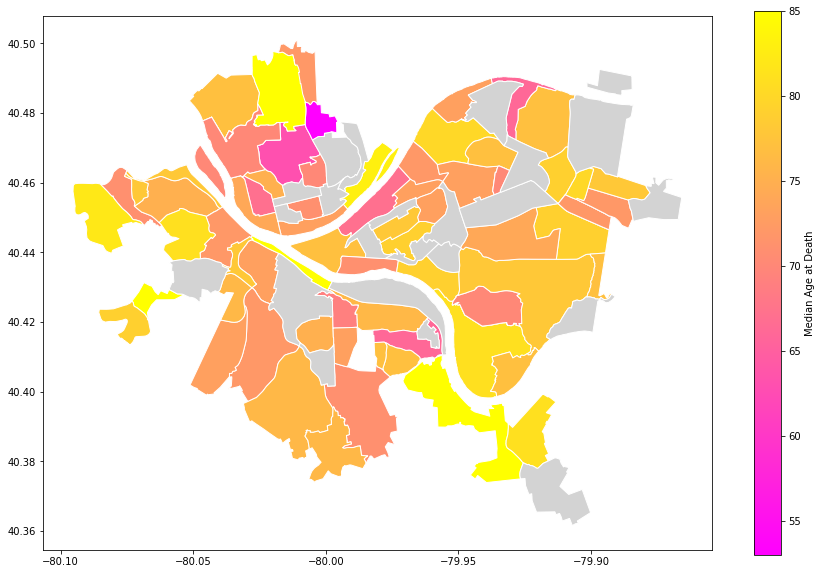

In [10]:
death_map.plot(column='Median Death', # set the data to be used for coloring
               cmap='spring',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Median Age at Death"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )